In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


df = pd.read_csv(r"C:\Gachon\3-1\인공지능개론\abalone.csv", index_col=None)

df.drop(columns=['id'])

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])


X=df.drop('Rings',axis=1)
X.head()
y=df['Rings']
y.value_counts()
y.head()

Y = pd.get_dummies(y).values

X = X.values
X
y
Y

# 일반적으로 원-핫 인코딩은 0과 1의 숫자 값을 사용하지만, 
# 특정 상황이나 설정에 따라 불리언 값(True/False)으로 표현될 수 있음.
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train.shape, X_test.shape, y_train.shape,y_test.shape


((3341, 9), (836, 9), (3341, 28), (836, 28))

In [43]:
print(X_train.shape)  # X_train의 차원 확인

(3341, 9)


In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam



model = Sequential()

model.add(Dense(20,input_shape=(9,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))  # 활성화 함수 없음 (기본값: 선형 활성화)


model.compile(Adam(learning_rate=0.04), 'mse', metrics=['accuracy'])

model.summary()

C:\Users\cha08\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 8)              │           168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429 (1.68 KB)

 Trainable params: 429 (1.68 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8098 - loss: 9856.7393 - val_accuracy: 0.9643 - val_loss: 0.1414
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.1353 - val_accuracy: 0.9643 - val_loss: 0.1161
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.1097 - val_accuracy: 0.9643 - val_loss: 0.0913
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.0859 - val_accuracy: 0.9643 - val_loss: 0.0710
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.0669 - val_accuracy: 0.9643 - val_loss: 0.0563
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.0535 - val_accuracy: 0.9643 - val_loss: 0.0465
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.0449 - val_accuracy: 0.9643 - val_loss: 0.0407
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9643 - loss: 0.0397 - val_accuracy:

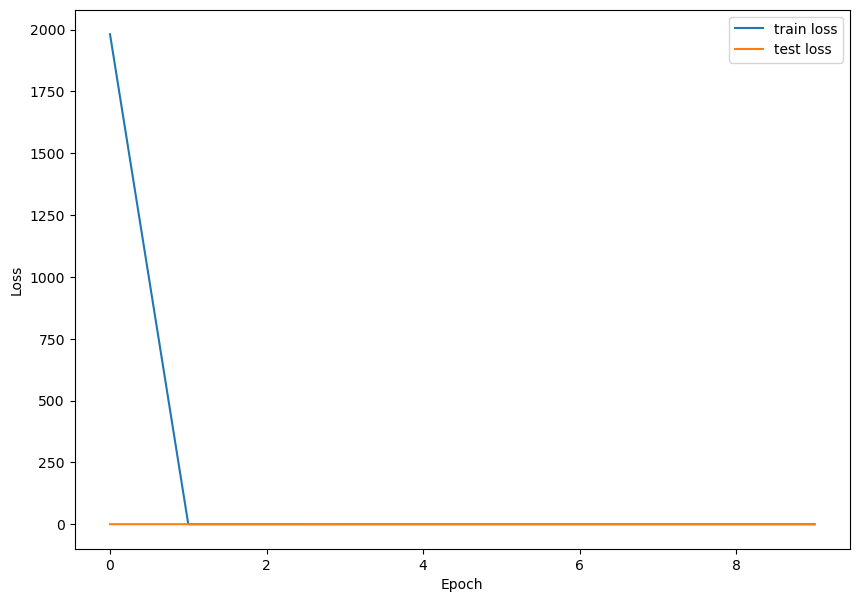

In [49]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [51]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.0350 


[0.03498918190598488, 0.9642854332923889]